In [30]:
import numpy as np
import urllib.request
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from scipy import stats

### Zadanie 1

In [31]:
url = 'https://extranet.who.int/tme/generateCSV.asp?ds=mdr_estimates'
urllib.request.urlretrieve(url, 'mdr.csv')

('mdr.csv', <http.client.HTTPMessage at 0x2aa0858a740>)

In [32]:
df = pd.read_csv('mdr.csv')
df.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_rr_new,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,source_rr_ret,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi
0,Afghanistan,AF,AFG,4,EMR,2015,Model,5.1,0.45,19.0,Surveillance,8.6,6.5,11.0,3600,0,10000
1,Afghanistan,AF,AFG,4,EMR,2016,Model,5.1,0.50,20.0,Surveillance,11.0,9.4,14.0,3800,0,11000
2,Afghanistan,AF,AFG,4,EMR,2017,Model,5.2,0.53,19.0,Surveillance,15.0,13.0,16.0,3900,0,11000
3,Afghanistan,AF,AFG,4,EMR,2018,Model,5.2,0.54,20.0,Surveillance,19.0,17.0,20.0,4100,0,12000
4,Afghanistan,AF,AFG,4,EMR,2019,Model,5.3,0.55,20.0,Surveillance,24.0,21.0,26.0,4300,0,12000


In [33]:
df.tail()

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_rr_new,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,source_rr_ret,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi
1486,Zimbabwe,ZW,ZWE,716,AFR,2017,Survey & Surveillance,3.5,3.2,3.8,Survey & Surveillance,20.0,16.0,24.0,1500,1000,2000
1487,Zimbabwe,ZW,ZWE,716,AFR,2018,Survey & Surveillance,2.9,2.7,3.1,Survey & Surveillance,21.0,18.0,25.0,1200,850,1600
1488,Zimbabwe,ZW,ZWE,716,AFR,2019,Survey & Surveillance,2.4,2.2,2.7,Survey & Surveillance,23.0,20.0,27.0,1000,710,1400
1489,Zimbabwe,ZW,ZWE,716,AFR,2020,Survey & Surveillance,2.0,1.7,2.4,Survey & Surveillance,25.0,20.0,30.0,830,540,1100
1490,Zimbabwe,ZW,ZWE,716,AFR,2021,Survey & Surveillance,1.7,1.3,2.1,Survey & Surveillance,28.0,21.0,34.0,780,480,1100


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1491 non-null   object 
 1   iso2             1484 non-null   object 
 2   iso3             1491 non-null   object 
 3   iso_numeric      1491 non-null   int64  
 4   g_whoregion      1491 non-null   object 
 5   year             1491 non-null   int64  
 6   source_rr_new    1491 non-null   object 
 7   e_rr_pct_new     1491 non-null   float64
 8   e_rr_pct_new_lo  1491 non-null   float64
 9   e_rr_pct_new_hi  1491 non-null   float64
 10  source_rr_ret    1491 non-null   object 
 11  e_rr_pct_ret     1491 non-null   float64
 12  e_rr_pct_ret_lo  1491 non-null   float64
 13  e_rr_pct_ret_hi  1491 non-null   float64
 14  e_inc_rr_num     1491 non-null   int64  
 15  e_inc_rr_num_lo  1491 non-null   int64  
 16  e_inc_rr_num_hi  1491 non-null   int64  
dtypes: float64(6),

In [35]:
df.describe()

,iso_numeric,year,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,432.215962,2018.000000,3.896385,2.693957,6.577787,17.071496,9.679611,31.596043,2148.600939,1202.430584,3150.439302
std,252.680328,2.000671,6.091549,6.029206,6.790237,13.267110,13.169322,21.302995,10349.915499,6613.101673,14310.469726
min,4.000000,2015.000000,0.250000,0.100000,0.430000,1.100000,0.200000,3.200000,0.000000,0.000000,0.000000
25%,212.000000,2016.000000,1.400000,0.340000,2.400000,8.400000,1.500000,14.000000,4.000000,0.000000,7.000000
50%,434.000000,2018.000000,2.300000,0.880000,4.200000,14.000000,4.400000,26.000000,74.000000,12.000000,120.000000
75%,643.000000,2020.000000,3.400000,2.000000,8.400000,20.000000,11.000000,48.000000,670.000000,220.000000,1400.000000
max,894.000000,2021.000000,45.000000,41.000000,49.000000,76.000000,69.000000,91.000000,149000.000000,94000.000000,223000.000000


In [36]:
mean = df['e_rr_pct_new'].mean()
median = df['e_rr_pct_new'].median()
min_value = df['e_rr_pct_new'].min()
max_value = df['e_rr_pct_new'].max()

In [37]:
print('Średnia:', mean)
print('Mediana:', median)
print('Minimum:', min_value)
print('Maksimum:', max_value)

Średnia: 3.896384976525822
Mediana: 2.3
Minimum: 0.25
Maksimum: 45.0


### Zadanie 2

In [38]:
df = pd.read_csv('Wzrost.csv', header=None,).T
df

,0
0,156
1,158
2,167
3,188
4,197
5,167
6,197
7,178
8,186
9,157


In [39]:
variance = statistics.variance(df[0])
stdev = statistics.stdev(df[0])

In [40]:
print(f'Wariancja: {variance}')
print(f'Odchylenie standardowe: {stdev}')

#Odchylenie standardowe to pierwiastek z obciążonego estymatora wariancji

Wariancja: 269.6764705882353
Odchylenie standardowe: 16.42182908777933


### Zadanie 3

In [41]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
urllib.request.urlretrieve(url, 'wine.csv')
df = pd.read_csv('wine.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [42]:
mean = stats.gmean(df['chlorides'])
median = stats.median_abs_deviation(df['chlorides'])
mode = stats.mode(df['chlorides'])
variance = stats.variation(df['chlorides'])


C:\Users\Andrzej\AppData\Local\Temp\ipykernel_5704\530910148.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df['chlorides'])


In [43]:
print(f'Średnia: {mean}')
print(f'Mediana: {median}')
print(f'Moda: {mode[0][0]}')
print(f'Wariancja: {variance}')

Średnia: 0.04289453967651245
Mediana: 0.007000000000000006
Moda: 0.044
Wariancja: 0.47726924204326704


### zadanie 4

In [44]:
df = pd.read_csv('brain_size.csv',sep=';')

df

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


In [49]:
print(f'Średnia dla kolumny VIQ:', df['VIQ'].mean())

df['Gender'].value_counts()

Średnia dla kolumny VIQ: 112.35


Female    20
Male      20
Name: Gender, dtype: int64

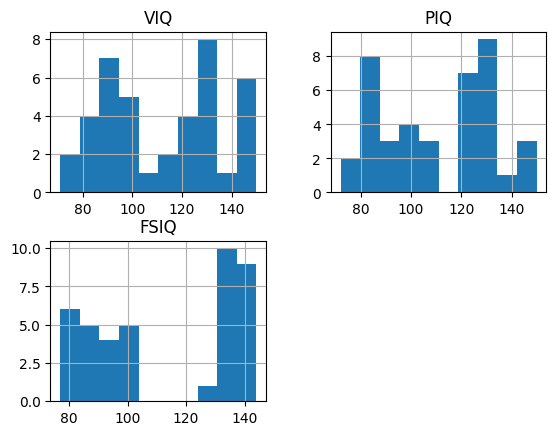

In [51]:
df.hist(column=['VIQ', 'PIQ', 'FSIQ'])
plt.show()

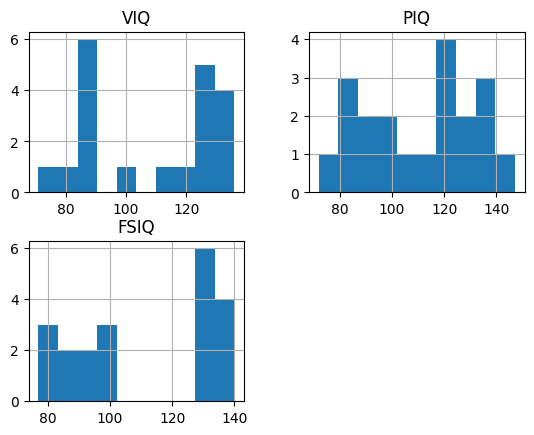

In [50]:
female_df = df[df['Gender'] == 'Female']

female_df.hist(column=['VIQ', 'PIQ', 'FSIQ'])
plt.show()